<center>
    <h1> 
        Realce de contraste utilizando transformações de potência
    </h1>
</center>
    <div style="text-align: right;"><h3>
        Carlos Eduardo Cassimiro da Silva
    </h3></div>

<center>
    <h4>Reprodução da figura 3.8 do livro Processamento Digital de Imagens (Gonzalez, Rafael C.)</h4>
</center>


<h4> Fonte da imagem </h4>
DIP3E_CH03_Original_Images.zip <br>
http://www.imageprocessingplace.com/DIP-3E/dip3e_book_images_downloads.htm

---

##### Módulos utilizados

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from copy import deepcopy

In [3]:
plt.style.use('ggplot')

## 1. Visualizando a imagem orignal

In [4]:
# Abrindo a imagem
img = cv2.imread('imagens_originais/Fig3.8.jpg')
# Transformando a imagem colorida em cinza
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

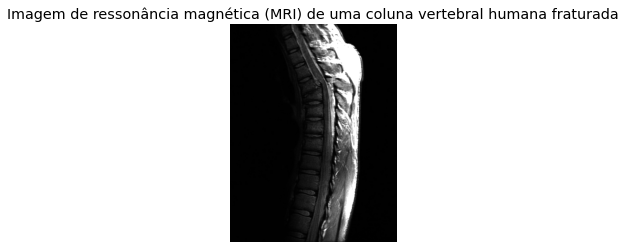

In [5]:
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Imagem de ressonância magnética (MRI) de uma coluna vertebral humana fraturada')
plt.show()

## 2.  Transformações de potência

Além da correção gama, as transformações de potência são úteis para a manipulação de contraste para uso geral. A fratura é visível perto do centro vertical da medula, aproximadamente um quarto para baixo em relação à borda superior da imagem. Como a imagem é predominantemente escura, uma expansão dos níveis de intensidade é desejável. Isso pode ser feito com uma transformação de potência utilizando um expoente fracionário, com a função: <br>
<center>$s=r^\gamma$</center>

In [6]:
# Salvando diferentes valore de gamma para realizarmos comparações
gamma = [0.6, 0.4, 0.3]

In [7]:
def gamma_adjustment(image, gamma):
    img = deepcopy(image)
    for i in range(len(img)):
        for j in range(len(img[0])):
            img[i][j] = img[i][j]**gamma # Aplicando o reajuste do gama para cada pixel
    return img

In [8]:
imgs_pross = {}
for i in gamma:
    imgs_pross[i] = gamma_adjustment(img, i)

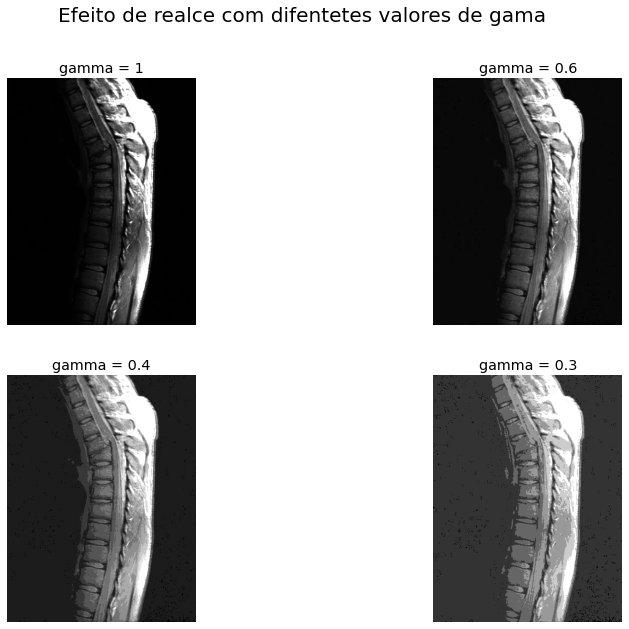

In [13]:
fig = plt.figure(figsize=(14,10))

fig.add_subplot(2,2,1); plt.axis('off')
plt.title('gamma = 1')
plt.imshow(img, cmap='gray')

fig.add_subplot(2,2,2); plt.axis('off')
plt.title('gamma = 0.6')
plt.imshow(imgs_pross[0.6], cmap='gray')

fig.add_subplot(2,2,3); plt.axis('off')
plt.title('gamma = 0.4')
plt.imshow(imgs_pross[0.4], cmap='gray')

fig.add_subplot(2,2,4); plt.axis('off')
plt.title('gamma = 0.3')
plt.imshow(imgs_pross[0.3], cmap='gray')

fig.suptitle('Efeito de realce com difentetes valores de gama', fontsize=20)
plt.show()